In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import spearmanr



In [24]:
data=pd.read_csv("ACME-HappinessSurvey2020.csv")
print(data.shape)

(126, 7)


In [25]:
data['X1'].value_counts()


5    65
4    40
3    20
1     1
Name: X1, dtype: int64

In [26]:
data['Y'].value_counts()

1    69
0    57
Name: Y, dtype: int64

In [27]:
filt=((data['Y']==1) & (data['X1']>3))
yes = data[filt]

In [28]:
yes = data[filt]
yes.count

<bound method DataFrame.count of      Y  X1  X2  X3  X4  X5  X6
2    1   5   3   3   3   3   5
5    1   5   5   3   5   5   5
7    1   5   4   4   4   4   5
12   1   5   2   4   5   5   5
17   1   5   1   4   3   4   5
..  ..  ..  ..  ..  ..  ..  ..
118  1   4   3   3   4   4   4
119  1   5   5   1   1   5   1
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5

[61 rows x 7 columns]>

In [29]:
respo=data.iloc[:,1:6].values
respo_name=['X1','X2','X3','X4','X5','X6']
y=data.iloc[:,0].values


In [30]:
X1=data['X1']
X2=data['X2']
X3=data['X3']
X4=data['X4']
X5=data['X5']
X6=data['X6']

data.corr(numeric_only=True, method='spearman')

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.291458,-0.034304,0.162199,0.081398,0.227306,0.174114
X1,0.291458,1.000000,0.015683,0.228081,0.065851,0.422786,0.512855
X2,-0.034304,0.015683,1.000000,0.156817,0.136659,0.030070,-0.037147
X3,0.162199,0.228081,0.156817,1.000000,0.275266,0.406356,0.179754
X4,0.081398,0.065851,0.136659,0.275266,1.000000,0.305012,0.141381
X5,0.227306,0.422786,0.030070,0.406356,0.305012,1.000000,0.330066
X6,0.174114,0.512855,-0.037147,0.179754,0.141381,0.330066,1.000000


<Axes: >

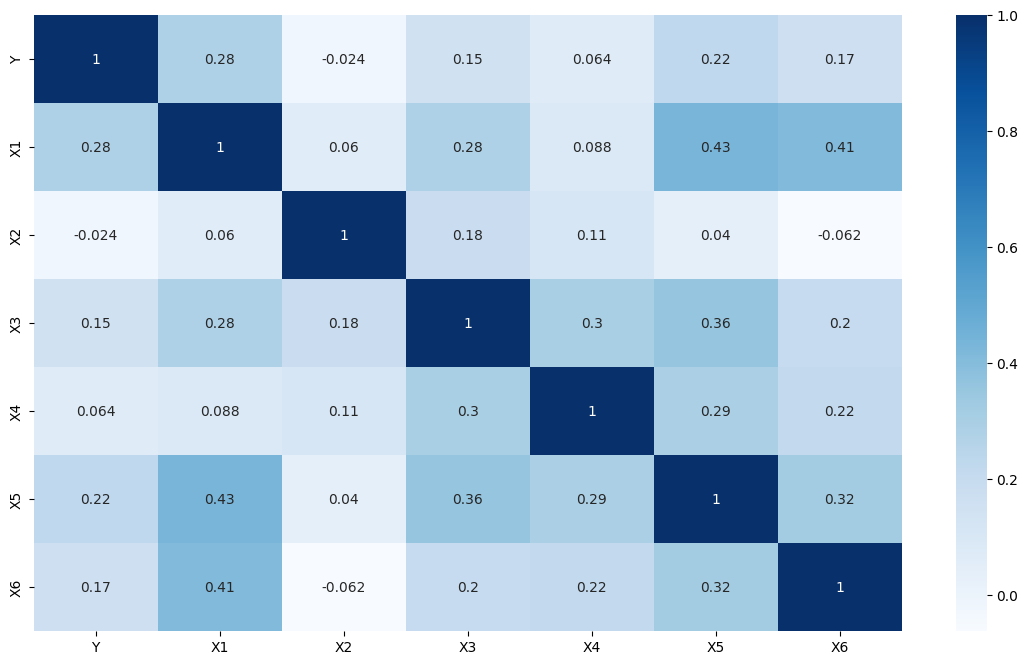

In [31]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')

In [32]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          Y     X1     X2     X3     X4     X5     X6
0    False  False  False  False  False  False  False
1    False  False  False  False  False  False  False
2    False  False  False  False  False  False  False
3    False  False  False  False  False  False  False
4    False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...
121  False  False  False  False  False  False  False
122  False  False  False  False  False  False  False
123  False  False  False  False  False  False  False
124  False  False  False  False  False  False  False
125  False  False  False  False  False  False  False

[126 rows x 7 columns]>

<Axes: xlabel='X6', ylabel='count'>

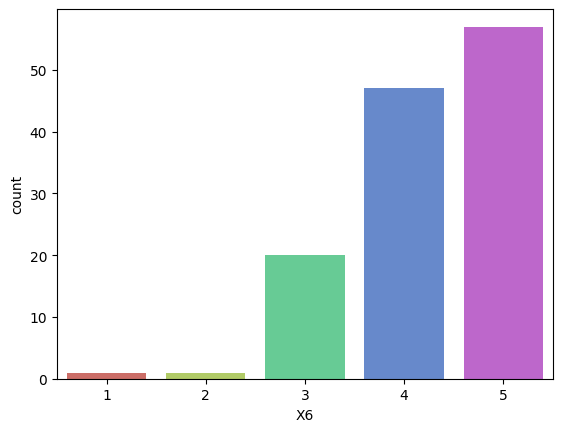

In [33]:
sns.countplot(x=data['X6'], data= data, palette='hls')

In [34]:
X = data.drop('Y', axis=1)
y = data['Y']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [35]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.69      0.61        16
           1       0.72      0.59      0.65        22

    accuracy                           0.63        38
   macro avg       0.64      0.64      0.63        38
weighted avg       0.65      0.63      0.63        38

Accuracy: 0.631578947368421
